# Testing Template Matching module individually

In [20]:
import cv2   
import numpy as np   
import matplotlib.pyplot as plt
import imutils
from scipy.spatial import ConvexHull

## Sample image inferred from Model

#### sample_input  dir: Contains 4 inferred samples from the model.

**NOTE:** The input window coords can be provided to this script in 2 ways:
#### 1.) Using mouse click event of OpenCV 
-> Record window coords by clicking on window corners(only ones in green(detected by model)). \
-> Start from top-left corner and move anti-clockwise.

#### 2.) Directly using window coords array(as shown below) from this Notebook. 
-> Use arr from below for corresponding image from **sample_input** dir.

**vis_Bakul_002_000920.png** \
coordinates = [[4, 317], [4, 434], [104, 434], [106, 326], [708, 324], [706, 437], [851, 443], [857, 327]]

**vis_Bakul_002_000970.png** \
coordinates = [[337, 2], [338, 128], [498, 128], [499, 0], [733, 3], [726, 127], [884, 129], [891, 4], [4, 390], [3, 495], [133, 501], [131, 391], [334, 399], [340, 504], [491, 504], [493, 394]]

**vis_Bakul_003_000470.png** \
coordinates = [[337, 107], [341, 251], [494, 248], [500, 108], [735, 111], [723, 254], [883, 259], [895, 116], [704, 538], [699, 625], [840, 625], [848, 539]]

**vis_Vindhya_002_000320.png** \
coordinates = [[502, 212], [503, 376], [642, 375], [650, 215], [837, 214], [831, 368], [958, 371], [959, 220]]

Use 2nd method to avoid reproducibility issues!

**Additional Note - Window coordinates array Format:** The coords array from method 1 or 2 is in the form of [[a,b], [c,d], [e,f], [g,h], [i,j], [k,l], [m,n], [o,p]...]
Here, 1st 4 elements i.e. [a,b] to [g,h] denotes the 1st window while the next 4 [i,j] to [k,l] denotes 2nd one. [a,b] is top-left and moving anti-clockwise [e,f] is bottom-right.

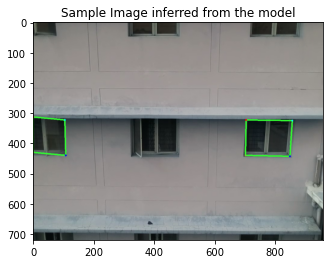

In [23]:
imgDirPath = "F:\\IIIT-H Work\\win_det_heatmaps\\rrcServerData\\templateMatching\\sample_input\\"
fileName = 'vis_Bakul_002_000920.png'
# imgDirPath = '/home/src21/Downloads/Drone-based-building-assessment-resolveNMS/templateMatching/images/resnet/'
# fileName = 'vis_Bakul_003_000470.png'

imgPath = imgDirPath + fileName
# Reading the main image   
img = cv2.imread(imgPath,1)
img_show = np.copy(img)
img_copy = np.copy(img)
img_copy_new = np.copy(img)
img_rgb = np.copy(img)

plt.figure()
plt.title('Sample Image inferred from the model')
plt.imshow(img_rgb)

### 1.  Inputting window coords using mouse click event - OpenCV
-> Record window coords by clicking on window corners(only ones in green(detected by model)). \
-> Start from top-left and move anti-clockwise.

In [24]:
coordinates = []
def click_event(event, x, y, flags, params):
  
    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
  
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
  
        # displaying the coordinates
        # on the image window
#         font = cv2.FONT_HERSHEY_SIMPLEX
#         cv2.putText(img, str(x) + ',' +
#                     str(y), (x,y), font,
#                     1, (255, 0, 0), 2)
        cv2.imshow('image', img)
        coordinates.append([x,y])
  
    # checking for right mouse clicks     
    if event==cv2.EVENT_RBUTTONDOWN:
  
        # displaying the coordinates
        # on the Shell
        print(x, ' ', y)
  
        # displaying the coordinates
        # on the image window
#         font = cv2.FONT_HERSHEY_SIMPLEX
#         b = img[y, x, 0]
#         g = img[y, x, 1]
#         r = img[y, x, 2]
#         cv2.putText(img, str(b) + ',' +
#                     str(g) + ',' + str(r),
#                     (x,y), font, 1,
#                     (255, 255, 0), 2)
        cv2.imshow('image', img)
        coordinates.append([x,y])
        
cv2.imshow('image',img_rgb)

#setting mouse hadler for the image
#and calling the click_event() function
cv2.setMouseCallback('image', click_event)

#wait for a key to be pressed to exit
cv2.waitKey(0)

#close the window
cv2.destroyAllWindows()

### 2. Inputting window coords directly from array

In [25]:
# vis_Bakul_002_000920.png
coordinates = [[4, 317], [4, 434], [104, 434], [106, 326], [708, 324], [706, 437], [851, 443], [857, 327]]

# vis_Bakul_002_000970.png
# coordinates = [[337, 2], [338, 128], [498, 128], [499, 0], [733, 3], [726, 127], [884, 129], [891, 4], [4, 390], [3, 495], [133, 501], [131, 391], [334, 399], [340, 504], [491, 504], [493, 394]]

# vis_Bakul_003_000470.png
# coordinates = [[337, 107], [341, 251], [494, 248], [500, 108], [735, 111], [723, 254], [883, 259], [895, 116], [704, 538], [699, 625], [840, 625], [848, 539]]

# vis_Vindhya_002_000320.png
# coordinates = [[502, 212], [503, 376], [642, 375], [650, 215], [837, 214], [831, 368], [958, 371], [959, 220]]

In [26]:
print('Window coords(before Template matching): \n', coordinates)
print("\n")

coords = np.array(coordinates)
coords = np.reshape(coords,(coords.shape[0]//4 , 4, coords.shape[1]))
print('Window coords reshaped(after Template matching): \n', coords)

Window coords(before Template matching): 
 [[4, 317], [4, 434], [104, 434], [106, 326], [708, 324], [706, 437], [851, 443], [857, 327]]


Window coords reshaped(after Template matching): 
 [[[  4 317]
  [  4 434]
  [104 434]
  [106 326]]

 [[708 324]
  [706 437]
  [851 443]
  [857 327]]]


In [27]:
# Loop through list to find range of x and y

def calculateRange(coordinates, padding, imageShape):
    minX = maxX = coordinates[0][0]
    minY = maxY = coordinates[0][1]
    startX = startY = endX = endY = 0
    h,w,c = imageShape
    for i in range(len(coordinates)):
        if minX > coordinates[i][0]:
            minX = coordinates[i][0]
        if maxX < coordinates[i][0]:
            maxX = coordinates[i][0]

        if minY > coordinates[i][1]:
            minY = coordinates[i][1]
        if maxY < coordinates[i][1]:
            maxY = coordinates[i][1]
    
    if (minX - padding < 0):
        startX = 0
    else:
        startX = minX - padding
    if (minY - padding < 0):
        startY = 0
    else:
        startY = minY - padding
    if (maxX + padding >= w):
        endX = w - 1
    else:
        endX = maxX + padding
    if (maxY + padding >= h):
        endY = h - 1
    else:
        endY = maxY + padding
    return startX, endX, startY, endY

## Non-maxima suppression

In [28]:
def non_max_suppression_fast(boxes, overlapThresh, res_scores_all, flag):
    # if there are no boxes, return an empty list
    if len(boxes) == 0:
        return []
    # if the bounding boxes integers, convert them to floats --
    # this is important since we'll be doing a bunch of divisions
    if boxes.dtype.kind == "i":
        boxes = boxes.astype("float")
    # initialize the list of picked indexes	
    pick = []
    # grab the coordinates of the bounding boxes
    x1 = boxes[:,0]
    y1 = boxes[:,1]
    x2 = boxes[:,2]
    y2 = boxes[:,3]
    # compute the area of the bounding boxes and sort the bounding
    #xxxx boxes by the bottom-right y-coordinate of the bounding box
    
    # sorting based on the score of the bounding box
    area = (x2 - x1 + 1) * (y2 - y1 + 1)
    if flag == 1:
        idxs = np.lexsort((y2, res_scores_all))
    else:
        idxs = np.lexsort((res_scores_all, y2))
    
    #if res_scores_all[idxs[-1]] == 1.0:
    #    print('Model Detected')
    #    return 0,0
    
    # keep looping while some indexes still remain in the indexes
    # list
    while len(idxs) > 0:
        # grab the last index in the indexes list and add the
        # index value to the list of picked indexes
        last = len(idxs) - 1
        i = idxs[last]
        print('last box', boxes[i])
        pick.append(i)
        # find the largest (x, y) coordinates for the start of
        # the bounding box and the smallest (x, y) coordinates
        # for the end of the bounding box
        xx1 = np.maximum(x1[i], x1[idxs[:last]])
        yy1 = np.maximum(y1[i], y1[idxs[:last]])
        xx2 = np.minimum(x2[i], x2[idxs[:last]])
        yy2 = np.minimum(y2[i], y2[idxs[:last]])
        # compute the width and height of the bounding box
        w = np.maximum(0, xx2 - xx1 + 1)
        h = np.maximum(0, yy2 - yy1 + 1)
        print('w',w)
        print('h',h)
        # compute the ratio of overlap
        overlap = (w * h) / area[idxs[:last]]
        print('overlap', overlap)
        # delete all indexes from the index list that have
        idxs = np.delete(idxs, np.concatenate(([last],
            np.where(overlap > overlapThresh)[0])))
    # return only the bounding boxes that were picked using the
    # integer data type
    return boxes[pick].astype("int"), res_scores_all[pick]

def nms_local(rects_all, res_scores_all, flag):
    overlapThresh = 0.25
    boxes = np.array(rects_all)
    res_scores_all = np.array(res_scores_all)
    
    xCoords = boxes[:,0]
    yCoords = boxes[:,1]
    xCoords2 = boxes[:,2]
    yCoords2 = boxes[:,3]

    boxes_tuples = []
    #loop over the starting (x, y)-coordinates again
    for (x, y, x2, y2) in zip(xCoords, yCoords, xCoords2, yCoords2):
        # update our list of rectangles
        boxes_tuples.append((x, y, x2, y2))

    # apply non-maxima suppression to the rectangles
    pick, resScores = non_max_suppression_fast(np.array(boxes_tuples), overlapThresh, res_scores_all, flag)
    print("[INFO] {} matched locations *after* NMS".format(len(pick)))
    # loop over the final bounding boxes
    print(pick)
    for (sX, sY, eX, eY) in pick:
        # draw the bounding box on the image
        cv2.rectangle(img_copy_new, (sX, sY), (eX, eY),
            (255, 0, 0), 3)
    plt.figure(num = 'nms')
    plt.imshow(img_copy_new)
    plt.title("Image After Local NMS")
    plt.show()

    return pick, resScores

In [29]:
def mapCoordsToOriginalFrame(coords, searchImgCoords):
    mappedCoords = []
    startX, endX, startY, endY = searchImgCoords
    
    for i in range(len(coords)):
        mappedCoords.append((coords[i][0], coords[i][1] + startY, coords[i][2], coords[i][3] + startY))
    return mappedCoords

def template_plot(template,searchImg,fileName,figname):
    plt.figure(num=figname, figsize=(20,10))
    plt.subplot(1, 2, 2)
    plt.imshow(template)
    plt.title('template_' + str(fileName))     
    plt.subplot(1, 2, 1)
    plt.imshow(searchImg)
    plt.title('templateMatched_' + str(fileName)) 
    plt.show()

## Template Matching

In [30]:
def matchTemplate(ind, coordinates, img_rgb, fileName, padding=10):    
    
    startX, endX, startY, endY = calculateRange(coordinates, padding, img_rgb.shape)
    plt.imshow(img_rgb)
    
    template = img_rgb[startY:endY, startX:endX, :]
    searchImg = img_rgb[startY:endY, : ,:]
    searchImg_copy = np.copy(searchImg)

    template_plot(template,searchImg,fileName,fileName)
    
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)   
    searchImg_gray = cv2.cvtColor(searchImg, cv2.COLOR_BGR2GRAY)
    
    rects = []
    res_scores = []
    for i in [-2.5, 0, 2.5]:
        # Apply rotation and shear to template
        rotatedTemplate = imutils.rotate(template, i)
        plt.imshow(rotatedTemplate)
        plt.title('rotatedTemplate_' + str(fileName)) 
        plt.show()
        
        template_gray = cv2.cvtColor(rotatedTemplate, cv2.COLOR_BGR2GRAY)   

        # Store width in variable w and height in variable h of template  
        tW, tH = template_gray.shape[::-1]   
        # Now we perform match operations.   
        res = cv2.matchTemplate(searchImg_gray,template_gray,cv2.TM_CCOEFF_NORMED)   
        
        # Declare a threshold   
        threshold = 0.550
        # Store the coordinates of matched region in a numpy array   
        loc = np.where( res >= threshold)
        
        # Draw a rectangle around the matched region.   
        for pt in zip(*loc[::-1]): 
            #print('x: ' + str(pt[0]) + ' y: ' + str(pt[1]))
            cv2.rectangle(searchImg_copy, pt, (pt[0] + tW, pt[1] + tH), (255,0,0), 1)   
            rects.append((pt[0], pt[1], pt[0] + tW, pt[1] + tH))
            res_scores.append(res[pt[1]][pt[0]])
            
            #print('res_scores',res_scores)        
            #print('rects_size',len(rects))     
            #print('res_size',res.shape)
            #print(res[0][pt[0]])
            #print('res',res)
            #print('res_scores_shape',len(res_scores))

    # Now display the final matched template image
    plt.figure(num=ind)
    plt.imshow(searchImg_copy)  
    plt.title('Result on search Image')
    plt.show()

    #cv2.imwrite('Template_' +  '0.6_threshold_' + fileName, template)
    #cv2.imwrite('TemplateMatched_'  + '0.6_threshold_' + fileName, searchImg)

    #print(np.array(rects).shape)    
    #print(rects)
    #for i in range(len(rects)):
    #    print(rects[i][0])
        
    searchImgCoords = startX, endX, startY, endY
    #print("rects: " + str(rects))
    #print("\n")
    mappedCoords = mapCoordsToOriginalFrame(rects, searchImgCoords)
    #print("mappedCoords: " + str(mappedCoords))

    for pt in (mappedCoords): 
        #print(str(pt[0]) + " "  + str(pt[1]))
        #print(str(pt[2]) + " "  + str(pt[3]))
        cv2.rectangle(img_show, (pt[0],pt[1]),  (pt[2], pt[3]), (255,0,0), 1)   
    
    print(mappedCoords[0][0])
    # Now display the final matched template image   
    plt.figure(num = 'mapped' + fileName, figsize=(20,10))
    plt.imshow(img_show)  
    plt.title('Image - All Template Matching Result')
    
    #tW_new = tW * np.ones(len(mappedCoords),dtype=int)
    #tH_new = tH * np.ones(len(mappedCoords),dtype=int)
    #tW_new = tW_new.tolist()
    #tH_new = tH_new.tolist()
    
    #rects_all = rects_all + mappedCoords
    #tW_all = tW_all + tW_new
    #tH_all = tH_all + tH_new
    #res_scores_all = res_scores_all + res_scores
    
    coord = (coordinates[0][0],coordinates[0][1],coordinates[2][0],coordinates[2][1])
    mapped_new = mappedCoords + [coord]
    res_scores_new = res_scores + [10.0]
    
    mappedrects_picked, res_scores_picked = nms_local(mapped_new, res_scores_new, 1)
    
    return mappedrects_picked, res_scores_picked


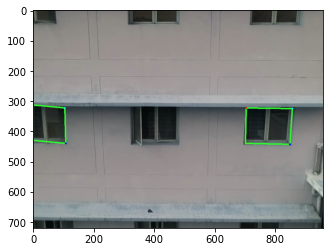

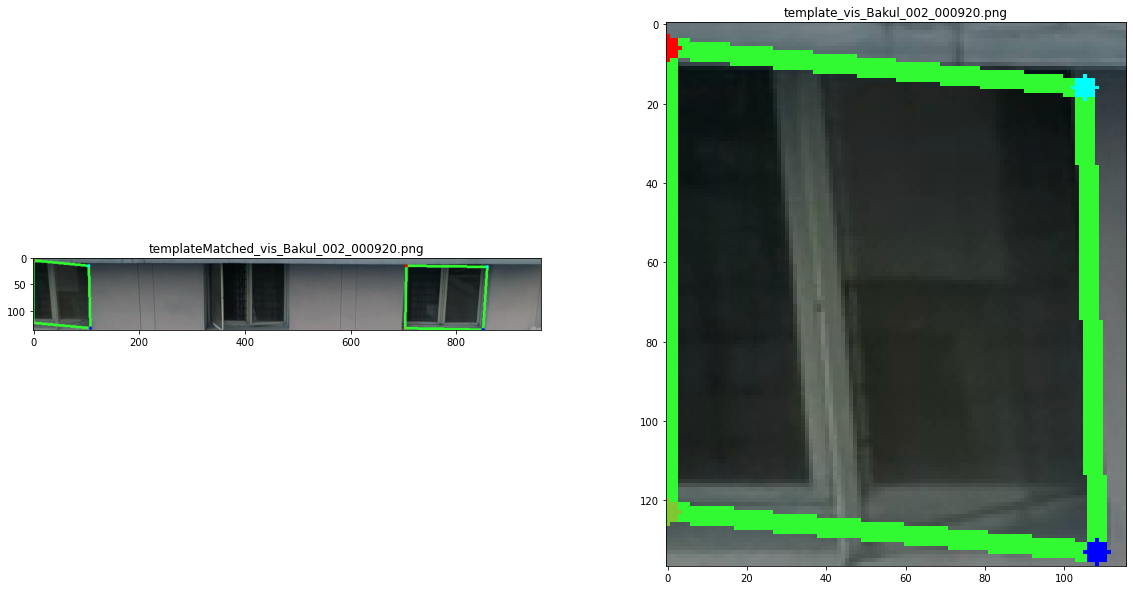

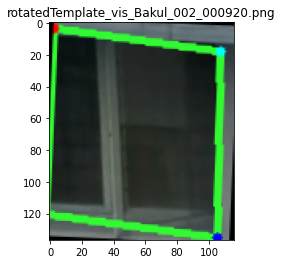

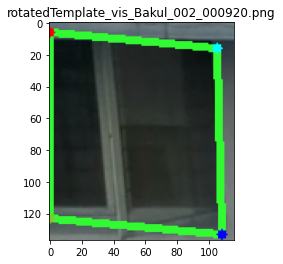

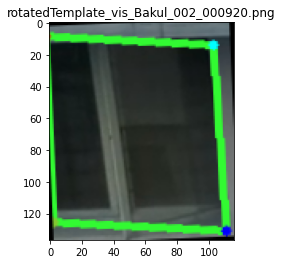

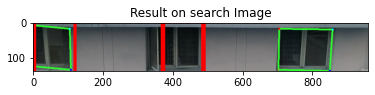

0
last box [  4. 317. 104. 434.]
w [  0.   0.   0.   0.   0.  99.   0.  97.   0.   0.   0.  99.   0.   0.
   0.   0.   0.   0.   0.  98.   0.   0.   0. 100.   0.   0.   0.   0.
 100.  99.   0.   0. 101.   0. 100.   0.   0.   0. 101. 101. 101. 101.
 101. 101. 101. 101. 101. 101. 101. 101. 101. 101.]
h [118. 118. 118. 118. 118. 118. 118. 118. 118. 118. 118. 118. 118. 118.
 118. 118. 118. 118. 118. 118. 118. 118. 118. 118. 118. 118. 118. 118.
 118. 118. 118. 118. 118. 118. 118. 118. 118. 118. 118. 118. 118. 118.
 118. 118. 118. 118. 118. 118. 118. 118. 118. 118.]
overlap [0.         0.         0.         0.         0.         0.72352285
 0.         0.70890623 0.         0.         0.         0.72352285
 0.         0.         0.         0.         0.         0.
 0.         0.71621454 0.         0.         0.         0.73083117
 0.         0.         0.         0.         0.73083117 0.72352285
 0.         0.         0.73813948 0.         0.73083117 0.
 0.         0.         0.73813948 0.738

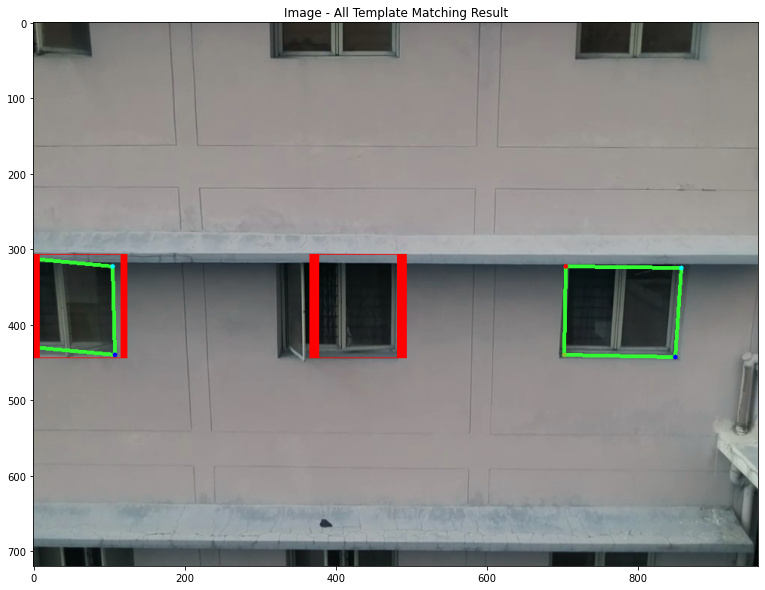

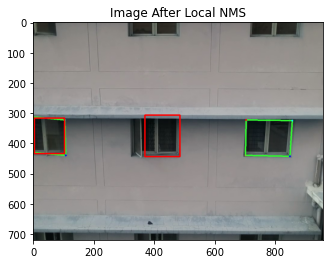

mappedrects_picked [[  4 317 104 434]
 [370 307 486 444]]
res_scores_picked [10.          0.65280437]


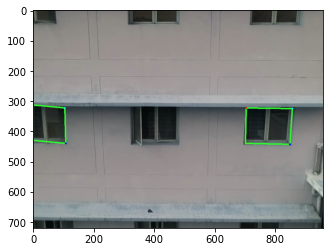

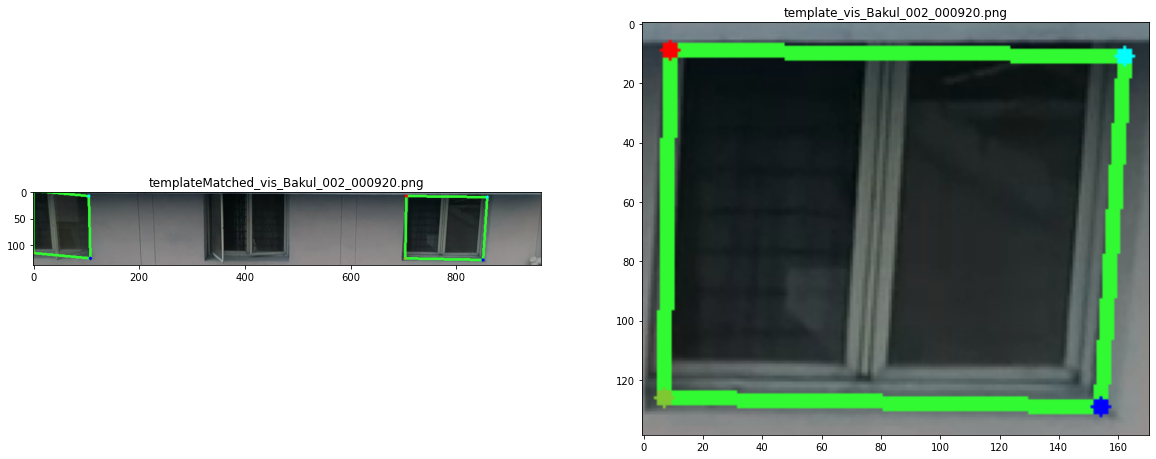

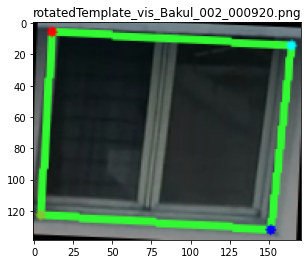

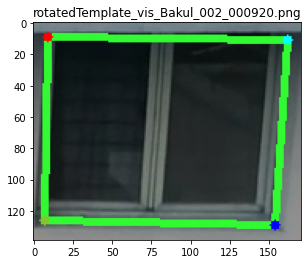

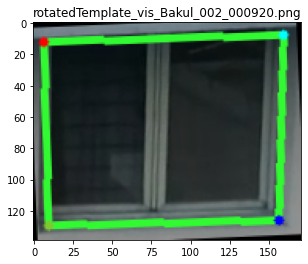

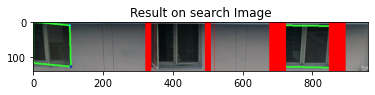

685
last box [708. 324. 851. 443.]
w [  0. 128. 144. 141.   0. 144.   0. 144. 129. 144. 144. 142.   0. 130.
   0. 144. 144. 144. 131. 143. 144.   0.   0. 144. 144. 132.   0. 144.
 144.   0. 144. 144. 144.   0. 133.   0. 144. 144. 144.   0. 144.   0.
 144. 134. 144.   0. 144. 135. 144.   0.   0. 136. 144.   0.   0. 137.
 144. 144. 138. 144. 139. 144. 140. 144. 141. 144. 142. 144. 144. 144.
 144. 143. 144. 144. 144. 144. 144. 144. 144. 144. 144. 144. 144. 144.
 144. 144. 144. 144. 144. 144. 144. 144. 144. 144. 144. 144. 144. 144.
 144. 144. 144. 144. 144. 144. 144. 144. 144. 144. 144. 144. 144. 144.
 144.]
h [120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120.
 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120.
 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120.
 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120.
 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120. 120.
 120. 120. 120. 120. 120. 120. 

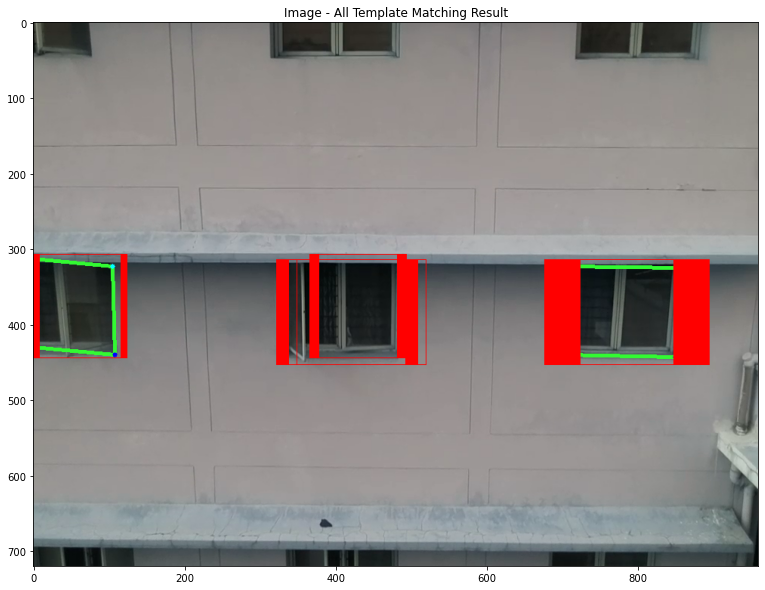

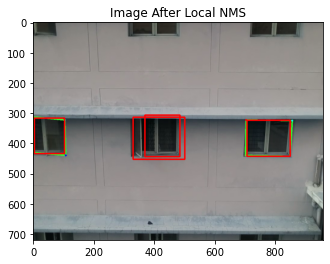

mappedrects_picked [[708 324 851 443]
 [331 314 502 453]
 [  4 317 104 434]
 [370 307 486 444]]
res_scores_picked [10.          0.61024261 10.          0.65280437]


In [31]:
#rects_all = []
#tW_all = []
#tH_all = []
#res_scores_all = []

#tW_all, tH_all, rects_all, res_scores_all = matchTemplate(tW_all, tH_all, rects_all, res_scores_all, 1, coords[0], img_rgb, fileName, padding=10)

mappedrects_picked_list = []
res_scores_picked_list = []
mappedrects_picked_list = np.array(mappedrects_picked_list)
res_scores_picked_list = np.array(res_scores_picked_list)

for ind in range(coords.shape[0]):
    mappedrects_picked, res_scores_picked = matchTemplate(ind, coords[ind], img_rgb, fileName, padding=10)
    if ind == 0:
        mappedrects_picked_list = mappedrects_picked
        #res_scores_picked_list = np.expand_dims(res_scores_picked,0)
        res_scores_picked_list = res_scores_picked
    elif ind != 0:        
        mappedrects_picked_list = np.vstack((mappedrects_picked, mappedrects_picked_list))
        res_scores_picked_list = np.hstack((res_scores_picked, res_scores_picked_list))

    print('mappedrects_picked',mappedrects_picked_list)
    print('res_scores_picked', res_scores_picked_list)


### NMS after Template Matching from all model-detected windows

boxes: an array of bounding boxes each with 2 co-ordinates - (x1, y1, x2, y2) \
lower left is (x1,y1), upper right is (x2,y2)

[[708 324 851 443]
 [331 314 502 453]
 [  4 317 104 434]
 [370 307 486 444]]
[10.          0.61024261 10.          0.65280437]
(4, 4)
(4,)
last box [331. 314. 502. 453.]
w [  0.   0. 117.]
h [118. 120. 131.]
overlap [0.         0.         0.94927536]
last box [708. 324. 851. 443.]
w [0.]
h [111.]
overlap [0.]
last box [  4. 317. 104. 434.]
w []
h []
overlap []
[INFO] 3 matched locations *after* NMS
[[331 314 502 453]
 [708 324 851 443]
 [  4 317 104 434]]


Text(0.5, 1.0, 'After NMS')

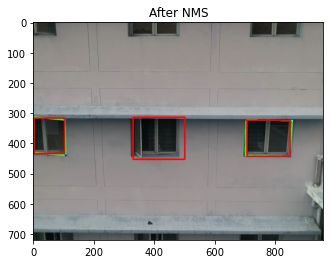

In [32]:
overlapThresh = 0.25
boxes = np.array(mappedrects_picked_list)
res_scores_all = np.array(res_scores_picked_list)

print(boxes)
print(res_scores_all)
print(boxes.shape)
print(res_scores_all.shape)

#boxes = boxes.reshape(boxes.shape[0]*boxes.shape[1], boxes.shape[2])
#res_scores_all = res_scores_all.reshape(res_scores_all.shape[0]*res_scores_all.shape[1])

xCoords = boxes[:,0]
yCoords = boxes[:,1]
xCoords2 = boxes[:,2]
yCoords2 = boxes[:,3]

# add model detected bounding box to rects
#for i in range(coords.shape[0]):
#    xCoords = np.append(xCoords, coords[i][1][0])
#    yCoords = np.append(yCoords, coords[i][1][1])
#    xCoords2 = np.append(xCoords2, coords[i][3][0])
#    yCoords2 = np.append(yCoords2, coords[i][3][1])
#    res_scores_all = np.append(res_scores_all, 1.0)
    
boxes_tuples = []
#loop over the starting (x, y)-coordinates again
for (x, y, x2, y2) in zip(xCoords, yCoords, xCoords2, yCoords2):
    # update our list of rectangles
    boxes_tuples.append((x, y, x2, y2))
    

# apply non-maxima suppression to the rectangles
pick, resScores = non_max_suppression_fast(np.array(boxes_tuples), overlapThresh, res_scores_all, 0)
print("[INFO] {} matched locations *after* NMS".format(len(pick)))
# loop over the final bounding boxes
print(pick)
for (sX, sY, eX, eY) in pick:
    # draw the bounding box on the image
    cv2.rectangle(img_copy, (sX, sY), (eX, eY),
        (255, 0, 0), 3)
plt.figure(num = 'nms')
plt.imshow(img_copy)
plt.title("After NMS")


### Calculating No. of windows/storeys

In [33]:
############### Calculating storey #####################
def calculateStoreys(coords):
    yTop = coords[:,1]
    yBottom = coords[:,3]
    yAvg = (yTop + yBottom)/2
#     print(yTop)
#     print(yBottom)
#     print(yAvg)
    storeyCount = 1 if len(coords) > 0 else 0
    index = 0
    for i in range(len(coords)):
        if ((yAvg[index] > yTop[i]) and (yAvg[index] < yBottom[i])):
            continue
        else:
            index = i
            storeyCounted = False
            for j in range(i):
                if ((yAvg[index] > yTop[j]) and (yAvg[index] < yBottom[j])):
                    storeyCounted = True
                    break
            if(storeyCounted == False):
                storeyCount+=1
    print('Number of storeys after running post processing module: ', storeyCount)
    return storeyCount

## Final Result

**NOTE:** List of window coordinates: [[a,b,c,d], [e,f,g,h], ....] \
1st window coordinates: [a,b,c,d] where (a,b) is top-left corner and (c,d) is bottom-right corner\
2nd window coordinates: [e,f,g,h] where (e,f) is top-left corner and (g,h) is bottom-right corner

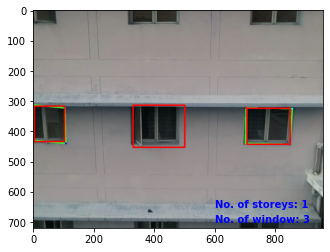

In [15]:
###### Display final result ###########
plt.imshow(img_copy)
plt.text(600, 700, "No. of window: " + str(noOfWindows), color="blue", fontdict={"fontsize":10, "fontweight":'bold', "ha":"left", "va":"baseline"})
plt.text(600, 650, "No. of storeys: " + str(noOfStoreys), color="blue", fontdict={"fontsize":10, "fontweight":'bold', "ha":"left", "va":"baseline"})
#Display the image
plt.show()

In [35]:
######## Print no. of floors and storeys
print('Window cordinates: {} \n'.format(coordinates))
noOfWindows = len(pick)
print('Number of windows detected by the model and post processing: {}'.format(noOfWindows))
noOfStoreys = calculateStoreys(pick)
print(pick)

Window cordinates: [[4, 317], [4, 434], [104, 434], [106, 326], [708, 324], [706, 437], [851, 443], [857, 327]] 

Number of windows detected by the model and post processing: 3
Number of storeys after running post processing module:  1
[[331 314 502 453]
 [708 324 851 443]
 [  4 317 104 434]]
